In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cares = pd.read_csv("../data/CARES_encoded.csv")
cares

,GENDER,RCRI score,Anemia category,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,AnaestypeCategory,...,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,RDW15.7,ASAcategorybinned,ICUAdmgt24h,Chinese,Indian,Malay
0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,NaN,NaN,0.0,0,1,0,0
1,0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,NaN,0.0,0.0,0,1,0,0
2,0,NaN,1.0,152.538570,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,0.0,0.0,0.0,0,1,0,0
3,1,NaN,2.0,117.231496,NaN,0.0,1.0,0.0,1.0,0,...,0,0,0,0.0,0.0,0.0,0,1,0,0
4,1,0.0,1.0,98.651255,59.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0.0,1.0,1.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90780,0,2.0,1.0,48.339582,NaN,0.0,0.0,0.0,0.0,0,...,0,1,0,2.0,0.0,1.0,0,0,0,0
90781,1,1.0,2.0,126.592489,NaN,0.0,0.0,0.0,0.0,0,...,0,1,0,0.0,0.0,NaN,0,0,0,0
90782,0,NaN,0.0,86.306771,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,1.0,0.0,NaN,0,0,0,0
90783,0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,NaN,NaN,1.0,0,1,0,0


Following what the papers say as "statistically significant"

In [3]:
cares.columns

Index(['GENDER', 'RCRI score', 'Anemia category', 'PreopEGFRMDRD',
       'DaysbetweenDeathandoperation', 'Preoptransfusionwithin30days',
       'Intraop', 'Postopwithin30days', 'Transfusionintraandpostop',
       'AnaestypeCategory', 'PriorityCategory',
       'TransfusionIntraandpostopCategory', 'AGEcategory', 'Mortality',
       'thirtydaymortality', 'SurgRiskCategory', 'CVARCRICategory',
       'IHDRCRICategory', 'CHFRCRICategory', 'DMinsulinRCRICategory',
       'CreatinineRCRICategory', 'GradeofKidneyCategory', 'RDW15.7',
       'ASAcategorybinned', 'ICUAdmgt24h', 'Chinese', 'Indian', 'Malay'],
      dtype='object')

In [4]:
# to predict mortality, these columns are considered important
mortality_significant_columns = [
    'AGEcategory',
    'SurgRiskCategory',
    'Chinese',
    'Indian',
    'Malay',
    'Anemia category',
    'GradeofKidneyCategory',
    'RDW15.7',
    'CVARCRICategory',
    'IHDRCRICategory',
    'CHFRCRICategory',
    'DMinsulinRCRICategory',
    'ASAcategorybinned',
    'GENDER'
]

mortality_cares = cares[mortality_significant_columns + ['Mortality']]

In [5]:
mortality_cares = mortality_cares.dropna(how='any')

In [6]:
mortality_cares.shape

(76064, 15)

In [7]:
mortality_cares["Mortality"].isna().value_counts()

Mortality
False    76064
Name: count, dtype: int64

In [8]:
mortality_cares["Mortality"].value_counts()

Mortality
0    71083
1     4981
Name: count, dtype: int64

In [9]:
icu_significant_columns = [
    'AGEcategory',
    'SurgRiskCategory',
    'Chinese',
    'Indian',
    'Malay',
    'Anemia category',
    'RDW15.7',
    'CVARCRICategory',
    'IHDRCRICategory',
    'CHFRCRICategory',
    'GradeofKidneyCategory',
    'DMinsulinRCRICategory',
    'ASAcategorybinned',
    'PriorityCategory',
    'GENDER'
]
# same as mortality, but with surgical priority column (Priority Category)

icu_cares = cares[icu_significant_columns + ["ICUAdmgt24h"]]

In [10]:
icu_cares = icu_cares.dropna(how='any')

In [11]:
icu_cares["ICUAdmgt24h"].value_counts()

ICUAdmgt24h
0    75008
1     1056
Name: count, dtype: int64

In [12]:
icu_cares.shape

(76064, 16)

Save as CSV

In [13]:
mortality_cares.to_csv("../data/CARES_mortality_dropna.csv", index=False)
icu_cares.to_csv("../data/CARES_ICU_dropna.csv", index=False)

# Simple Modeling

## Mortality

In [14]:
RANDOM_SEED = 3402

In [15]:
np.random.seed(RANDOM_SEED)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = mortality_cares.drop('Mortality', axis=1)
y = mortality_cares['Mortality']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y)

Oversampling

In [18]:
from imblearn.over_sampling import SMOTE

In [19]:
smote = SMOTE()

x_res, y_res = smote.fit_resample(x_train, y_train)

In [20]:
model_evaluations = {}

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [22]:
logreg_mort = LogisticRegression(random_state=RANDOM_SEED)
rf_mort = RandomForestClassifier(random_state=RANDOM_SEED)

# apply the same for smote data
logreg_mort_smote = LogisticRegression(random_state=RANDOM_SEED)
rf_mort_smote = RandomForestClassifier(random_state=RANDOM_SEED)

#### Logistic Regression

In [23]:
logreg_mort.fit(x_train, y_train)
logreg_mort_smote.fit(x_res, y_res)

LogisticRegression(random_state=3402)

In [24]:
rf_mort.fit(x_train, y_train)
rf_mort_smote.fit(x_res, y_res)

RandomForestClassifier(random_state=3402)

In [25]:
y_pred = logreg_mort.predict(x_test)
y_pred_proba = logreg_mort.predict_proba(x_test)

In [26]:
from sklearn.metrics import f1_score, roc_curve, auc, classification_report, precision_recall_curve, confusion_matrix

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     21326
           1       0.51      0.10      0.17      1494

    accuracy                           0.93     22820
   macro avg       0.72      0.55      0.57     22820
weighted avg       0.91      0.93      0.91     22820



In [28]:
f1_score(y_test, y_pred)

0.16759776536312848

In [29]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

In [30]:
auc(fpr, tpr)

0.856316525597843

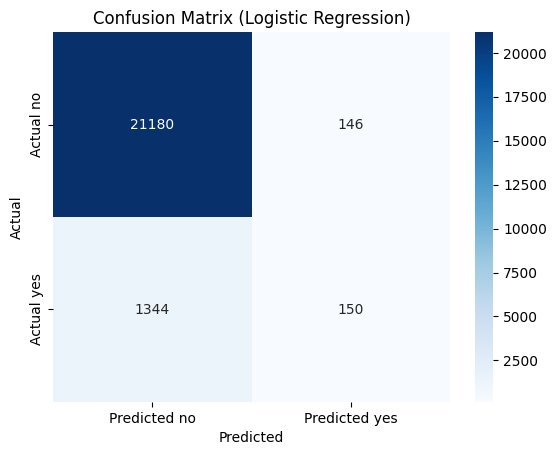

In [31]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

In [32]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
normalized_conf_mat

,Predicted no,Predicted yes
Actual no,0.94033,0.493243
Actual yes,0.05967,0.506757


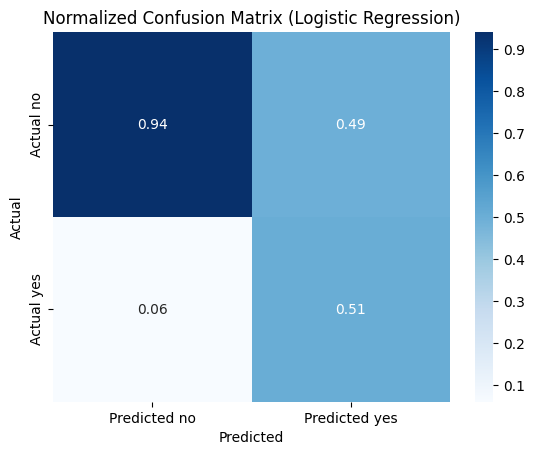

In [33]:
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Logistic Regression)')
plt.show()

In [36]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [37]:
model_evaluations["Logistic Regression"] = (fpr, tpr, prec, rec)

#### Logistic Regression SMOTE

In [38]:
y_pred = logreg_mort_smote.predict(x_test)
y_pred_proba = logreg_mort_smote.predict_proba(x_test)

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88     21326
           1       0.21      0.76      0.33      1494

    accuracy                           0.80     22820
   macro avg       0.59      0.78      0.60     22820
weighted avg       0.93      0.80      0.84     22820



In [40]:
f1_score(y_test, y_pred)

0.3267197682838523

In [41]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

In [42]:
auc(fpr, tpr)

0.8519515085569701

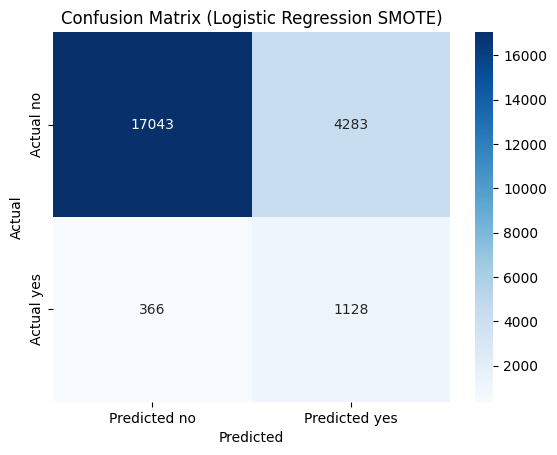

In [43]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression SMOTE)')
plt.show()

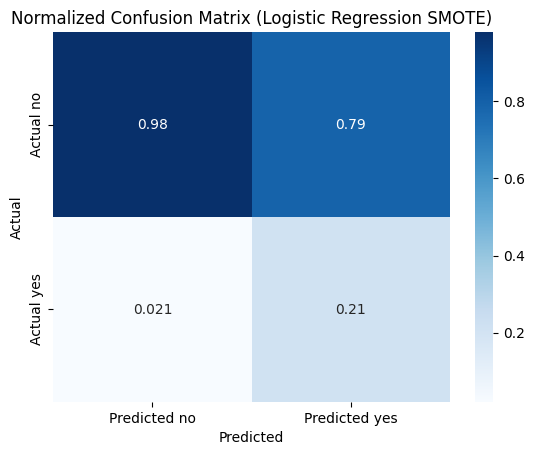

In [44]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Logistic Regression SMOTE)')
plt.show()

In [47]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [48]:
model_evaluations["Logistic Regression SMOTE"] = (fpr, tpr, prec, rec)

#### Random Forest

In [49]:
y_pred = rf_mort.predict(x_test)
y_pred_proba = rf_mort.predict_proba(x_test)

In [50]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96     21326
           1       0.43      0.15      0.23      1494

    accuracy                           0.93     22820
   macro avg       0.69      0.57      0.60     22820
weighted avg       0.91      0.93      0.92     22820



In [51]:
f1_score(y_test, y_pred)

0.22702702702702704

In [52]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

0.8061623781066309

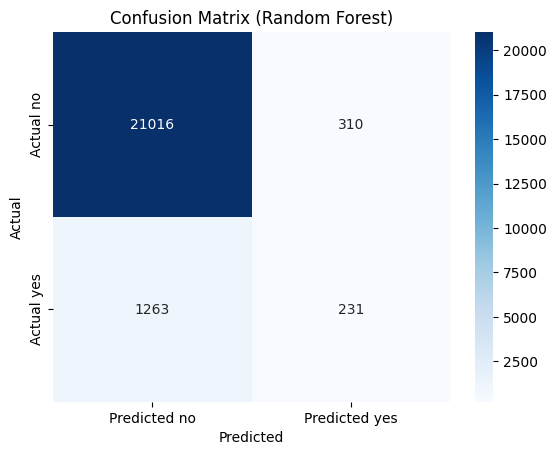

In [53]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

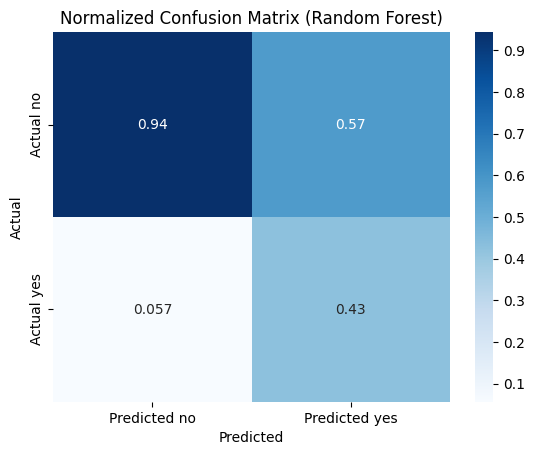

In [54]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Random Forest)')
plt.show()

In [56]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [57]:
model_evaluations["Random Forest"] = (fpr, tpr, prec, rec)

#### Random Forest SMOTE

In [58]:
y_pred = rf_mort_smote.predict(x_test)
y_pred_proba = rf_mort_smote.predict_proba(x_test)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91     21326
           1       0.21      0.50      0.30      1494

    accuracy                           0.84     22820
   macro avg       0.59      0.69      0.60     22820
weighted avg       0.91      0.84      0.87     22820



In [60]:
f1_score(y_test, y_pred)

0.29710001972775696

In [61]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

0.7535128164664033

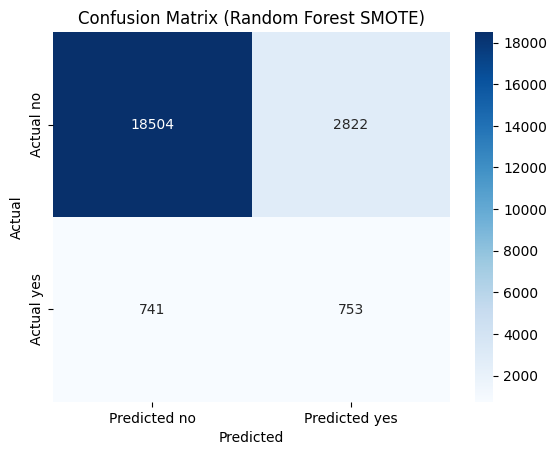

In [62]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest SMOTE)')
plt.show()

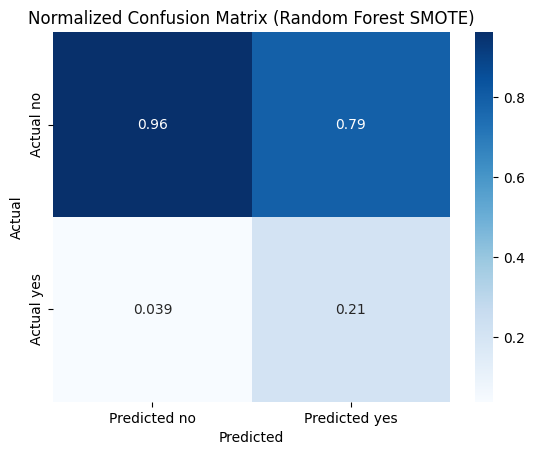

In [63]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Random Forest SMOTE)')
plt.show()

In [64]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [65]:
model_evaluations["Random Forest SMOTE"] = (fpr, tpr, prec, rec)

In [66]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

#### Neural Net

In [67]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

In [68]:
model = Sequential()
model.add(Input((X.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [69]:
model.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])

In [70]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - auc: 0.6060 - f1_score: 0.1244 - loss: 0.2757 - val_auc: 0.8434 - val_f1_score: 0.1229 - val_loss: 0.1885
Epoch 2/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - auc: 0.8309 - f1_score: 0.1237 - loss: 0.1930 - val_auc: 0.8531 - val_f1_score: 0.1229 - val_loss: 0.1846
Epoch 3/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - auc: 0.8490 - f1_score: 0.1231 - loss: 0.1862 - val_auc: 0.8560 - val_f1_score: 0.1229 - val_loss: 0.1821
Epoch 4/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - auc: 0.8475 - f1_score: 0.1216 - loss: 0.1844 - val_auc: 0.8579 - val_f1_score: 0.1229 - val_loss: 0.1815
Epoch 5/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - auc: 0.8503 - f1_score: 0.1225 - loss: 0.1837 - val_auc: 0.8593 - val_f1_score: 0.1229 - val_loss: 0.1809
Epoch 6/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - auc: 0.8585 - f1_score: 0.1231 - loss: 0.1809 - val_auc: 0.8586 - val_f1_score: 0.1229 - val_loss: 0.1811
Epoch 7/10
1664/

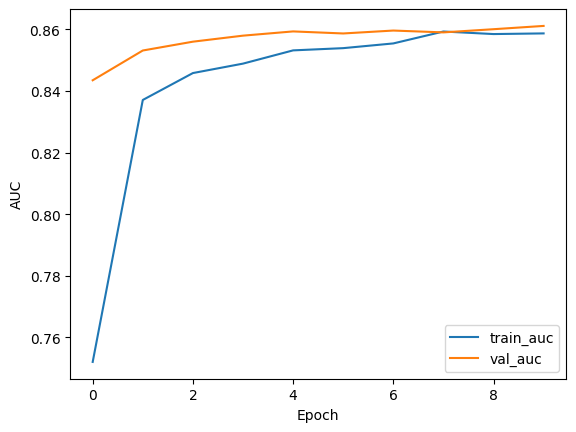

In [72]:
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [73]:
y_pred_proba = model.predict(x_test)

714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 975us/step


In [74]:
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

In [75]:
f1_score(y_test, y_pred)

0.12186379928315412

In [76]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc(fpr, tpr)

0.8612099779279048

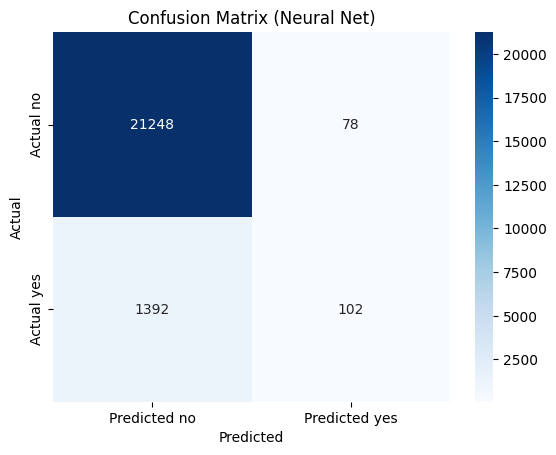

In [77]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Net)')
plt.show()

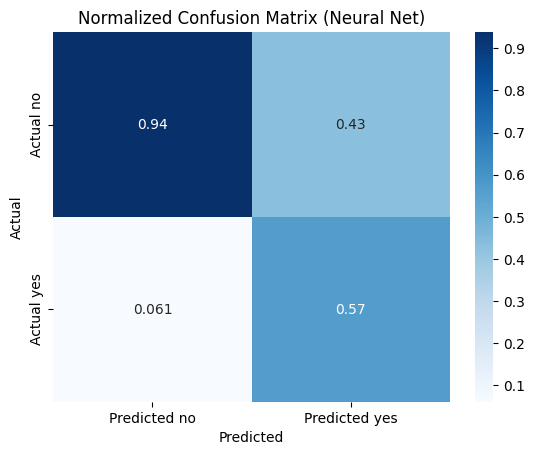

In [78]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Neural Net)')
plt.show()

In [79]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba)

In [80]:
model_evaluations["Neural Net"] = (fpr, tpr, prec, rec)

#### Neural Net SMOTE

In [81]:
model_smote = Sequential()
model_smote.add(Input((X.shape[1],)))
model_smote.add(Dense(32, activation='relu'))
model_smote.add(Dense(16, activation='relu'))
model_smote.add(Dropout(0.2))
model_smote.add(Dense(1, activation='sigmoid'))

In [82]:
model_smote.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])

In [83]:
model_smote.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 32)             │           480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,025 (4.00 KB)

 Trainable params: 1,025 (4.00 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
history = model_smote.fit(x_res, y_res, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 33s 10ms/step - auc: 0.8044 - f1_score: 0.6669 - loss: 0.5307 - val_auc: 0.8532 - val_f1_score: 0.1229 - val_loss: 0.4726
Epoch 2/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - auc: 0.8606 - f1_score: 0.6670 - loss: 0.4657 - val_auc: 0.8550 - val_f1_score: 0.1229 - val_loss: 0.4549
Epoch 3/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - auc: 0.8622 - f1_score: 0.6663 - loss: 0.4630 - val_auc: 0.8524 - val_f1_score: 0.1229 - val_loss: 0.4762
Epoch 4/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - auc: 0.8632 - f1_score: 0.6644 - loss: 0.4617 - val_auc: 0.8514 - val_f1_score: 0.1229 - val_loss: 0.4406
Epoch 5/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - auc: 0.8648 - f1_score: 0.6680 - loss: 0.4587 - val_auc: 0.8510 - val_f1_score: 0.1229 - val_loss: 0.4366
Epoch 6/10
3110/3110 ━━━━━━━━━━━━━━━━━━━━ 32s 10ms/step - auc: 0.8665 - f1_score: 0.6654 - loss: 0.4564 - val_auc: 0.8506 - val_f1_score: 0.1229 - val_loss: 0.4764
Epoch 7/10
3110/

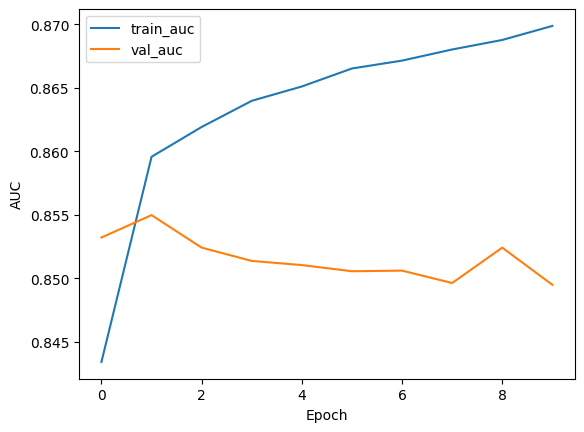

In [85]:
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [86]:
y_pred_proba = model_smote.predict(x_test)

714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step


In [87]:
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

In [88]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc(fpr, tpr)

0.8495175644589675

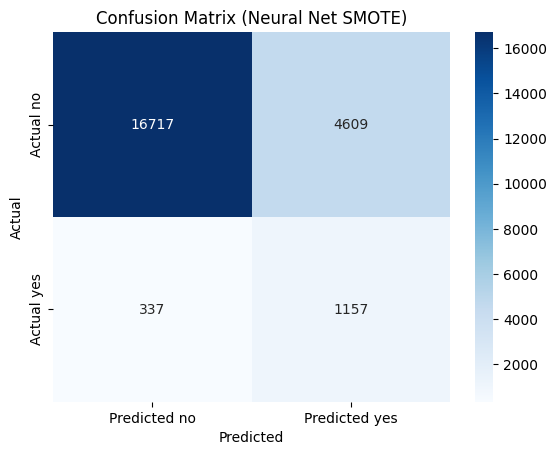

In [89]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Net SMOTE)')
plt.show()

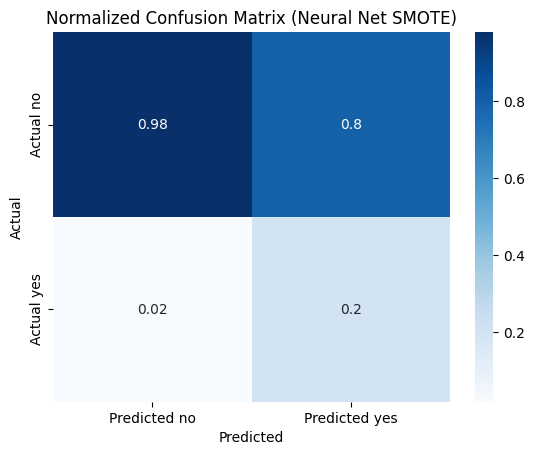

In [90]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Neural Net SMOTE)')
plt.show()

In [91]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba)

In [92]:
model_evaluations["Neural Net SMOTE"] = (fpr, tpr, prec, rec)

#### XGBoost

In [93]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=RANDOM_SEED)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
y_pred_proba = xgb.predict_proba(x_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     21326
           1       0.49      0.12      0.19      1494

    accuracy                           0.93     22820
   macro avg       0.72      0.56      0.58     22820
weighted avg       0.91      0.93      0.92     22820

0.19257665411511565


0.8559282300981725

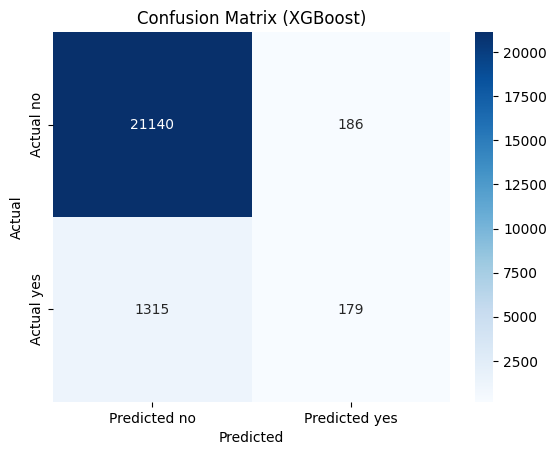

In [94]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost)')
plt.show()

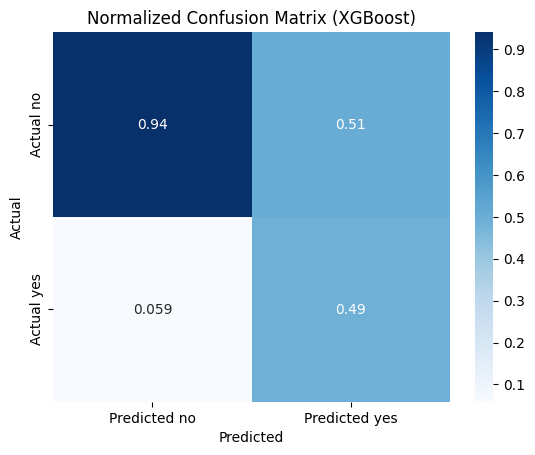

In [95]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (XGBoost)')
plt.show()

In [96]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [97]:
model_evaluations["XGBoost"] = (fpr, tpr, prec, rec)

#### XGBoost SMOTE

In [98]:
xgb = XGBClassifier(random_state=RANDOM_SEED)
xgb.fit(x_res, y_res)
y_pred = xgb.predict(x_test)
y_pred_proba = xgb.predict_proba(x_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

              precision    recall  f1-score   support

           0       0.97      0.85      0.90     21326
           1       0.22      0.61      0.32      1494

    accuracy                           0.83     22820
   macro avg       0.59      0.73      0.61     22820
weighted avg       0.92      0.83      0.87     22820

0.3213778409090909


0.804940651034536

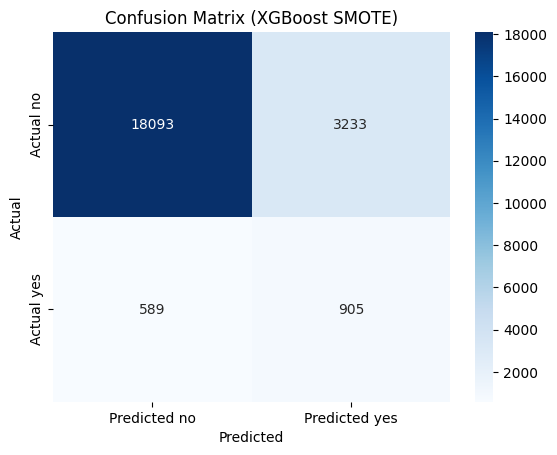

In [99]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost SMOTE)')
plt.show()

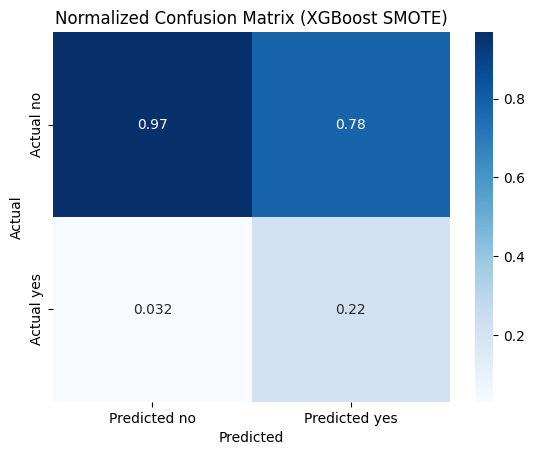

In [100]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (XGBoost SMOTE)')
plt.show()

In [101]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [102]:
model_evaluations["XGBoost SMOTE"] = (fpr, tpr, prec, rec)

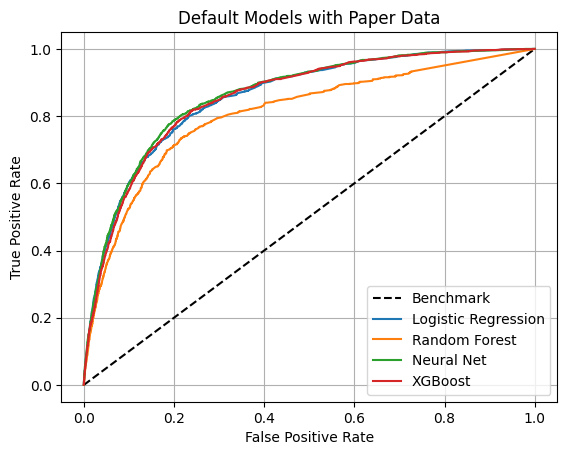

In [103]:
plt.title("Default Models with Paper Data")
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")

for model_name in model_evaluations:
    if "SMOTE" in model_name:
        continue
    plt.plot(model_evaluations[model_name][0], model_evaluations[model_name][1], label=model_name)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()

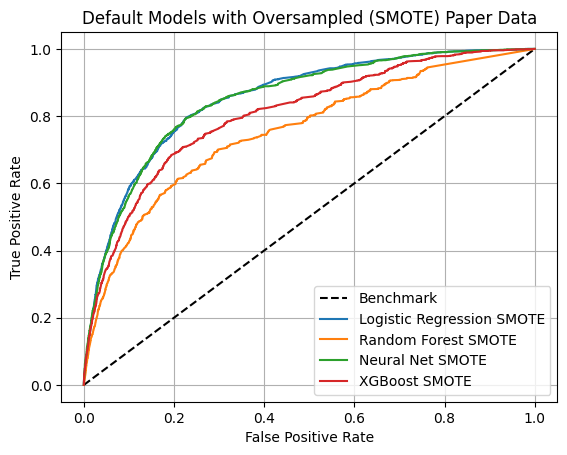

In [104]:
plt.title("Default Models with Oversampled (SMOTE) Paper Data")
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")

for model_name in model_evaluations:
    if "SMOTE" not in model_name:
        continue
    plt.plot(model_evaluations[model_name][0], model_evaluations[model_name][1], label=model_name)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()

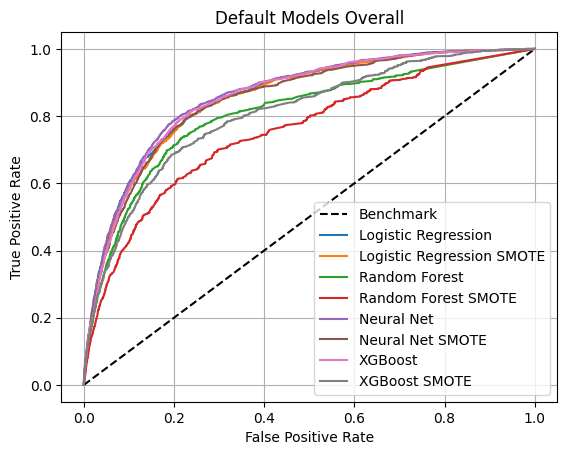

In [105]:
plt.title("Default Models Overall")
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")

for model_name in model_evaluations:
    plt.plot(model_evaluations[model_name][0], model_evaluations[model_name][1], label=model_name)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()

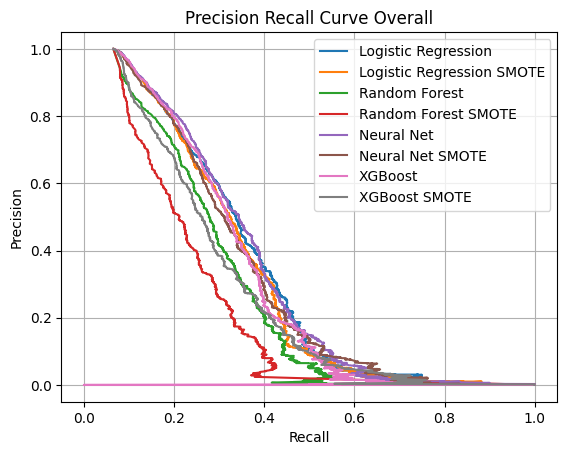

In [106]:
# precision recall curve
plt.title("Precision Recall Curve Overall")

for model_name in model_evaluations:
    plt.plot(model_evaluations[model_name][3], model_evaluations[model_name][2], label=model_name)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.legend()


## ICU

In [107]:
X = icu_cares.drop('ICUAdmgt24h', axis=1)
y = icu_cares['ICUAdmgt24h']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED, stratify=y)

In [108]:
x_res, y_res = smote.fit_resample(x_train, y_train)

In [109]:
model_evaluations = {}

In [110]:
x_res.shape

(105010, 15)

#### Logistic Regression

In [111]:
logreg_icu = LogisticRegression(random_state=RANDOM_SEED)

In [112]:
logreg_icu.fit(x_train, y_train)

LogisticRegression(random_state=3402)

In [113]:
y_pred = logreg_icu.predict(x_test)
y_pred_proba = logreg_icu.predict_proba(x_test)

In [114]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22503
           1       0.30      0.04      0.07       317

    accuracy                           0.99     22820
   macro avg       0.64      0.52      0.53     22820
weighted avg       0.98      0.99      0.98     22820



In [115]:
f1_score(y_test, y_pred)

0.07202216066481995

In [116]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

In [117]:
auc(fpr, tpr)

0.8873934929951856

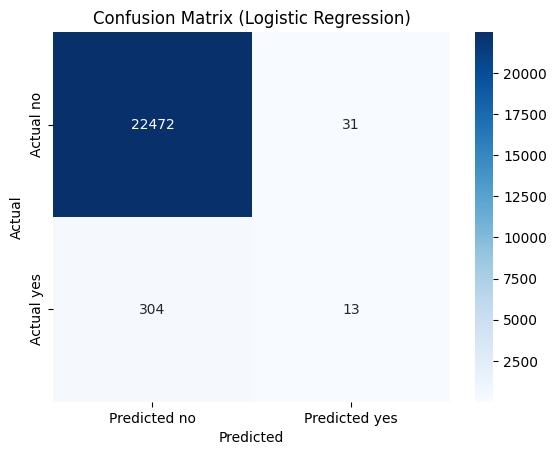

In [118]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

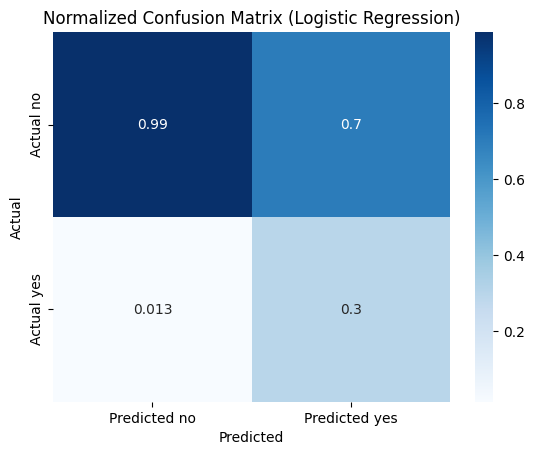

In [119]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Logistic Regression)')
plt.show()

In [121]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [122]:
model_evaluations["Logistic Regression"] = (fpr, tpr, prec, rec)

#### Logistic Regression SMOTE

In [123]:
logreg_icu_smote = LogisticRegression(random_state=RANDOM_SEED)

In [124]:
logreg_icu_smote.fit(x_res, y_res)

LogisticRegression(random_state=3402)

In [125]:
y_pred = logreg_icu_smote.predict(x_test)
y_pred_proba = logreg_icu_smote.predict_proba(x_test)

In [126]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91     22503
           1       0.06      0.78      0.11       317

    accuracy                           0.83     22820
   macro avg       0.53      0.80      0.51     22820
weighted avg       0.98      0.83      0.90     22820



In [127]:
f1_score(y_test, y_pred)

0.11299954065227377

In [128]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

In [129]:
auc(fpr, tpr)

0.8698077550403025

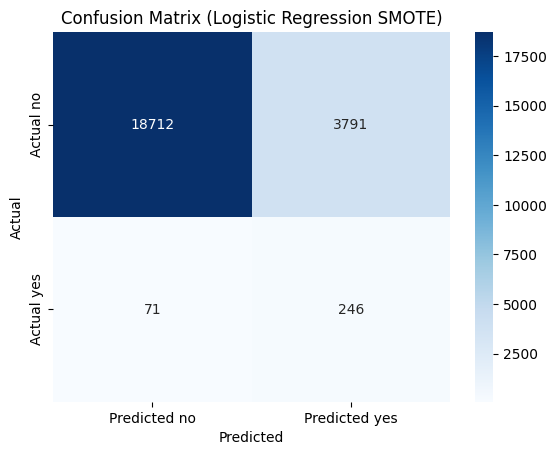

In [130]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression SMOTE)')
plt.show()

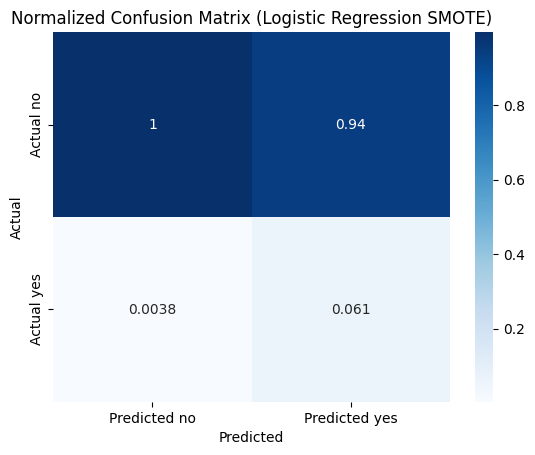

In [131]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Logistic Regression SMOTE)')
plt.show()

In [132]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [133]:
model_evaluations["Logistic Regression SMOTE"] = (fpr, tpr, prec, rec)

#### Random Forest

In [134]:
rf_icu = RandomForestClassifier(random_state=RANDOM_SEED)

In [138]:
rf_icu.fit(x_train, y_train)
y_pred = rf_icu.predict(x_test)
y_pred_proba = rf_icu.predict_proba(x_test)
print(classification_report(y_test, y_pred))
f1_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
print(auc(fpr, tpr))
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
model_evaluations["Random Forest"] = (fpr, tpr, prec, rec)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22503
           1       0.22      0.06      0.09       317

    accuracy                           0.98     22820
   macro avg       0.60      0.53      0.54     22820
weighted avg       0.98      0.98      0.98     22820

0.7541663915543824


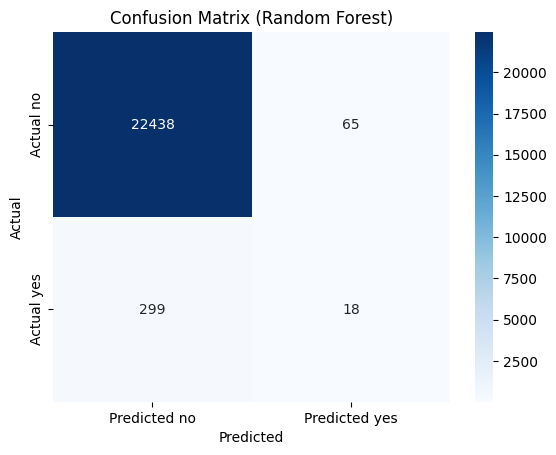

In [139]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

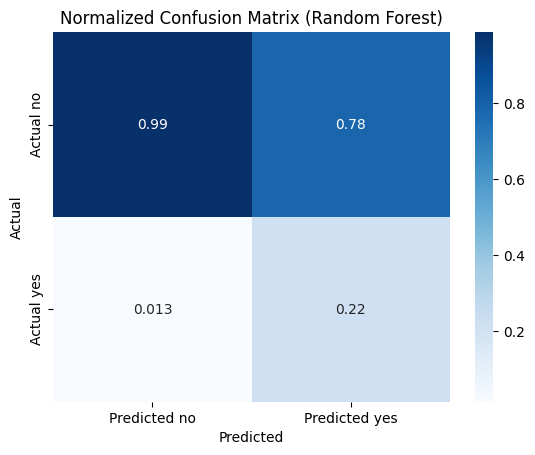

In [140]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Random Forest)')
plt.show()

#### Random Forest SMOTE


In [141]:
rf_icu_smote = RandomForestClassifier(random_state=RANDOM_SEED)
rf_icu_smote.fit(x_res, y_res)
y_pred = rf_icu_smote.predict(x_test)
y_pred_proba = rf_icu_smote.predict_proba(x_test)

In [143]:
print(classification_report(y_test, y_pred))
f1_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
print(auc(fpr, tpr))
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
model_evaluations["Random Forest SMOTE"] = (fpr, tpr, prec, rec)

              precision    recall  f1-score   support

           0       0.99      0.94      0.96     22503
           1       0.05      0.21      0.08       317

    accuracy                           0.93     22820
   macro avg       0.52      0.58      0.52     22820
weighted avg       0.98      0.93      0.95     22820

0.7005977191123903


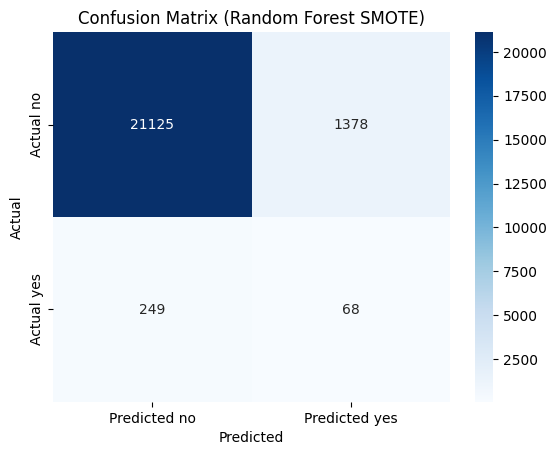

In [144]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest SMOTE)')
plt.show()

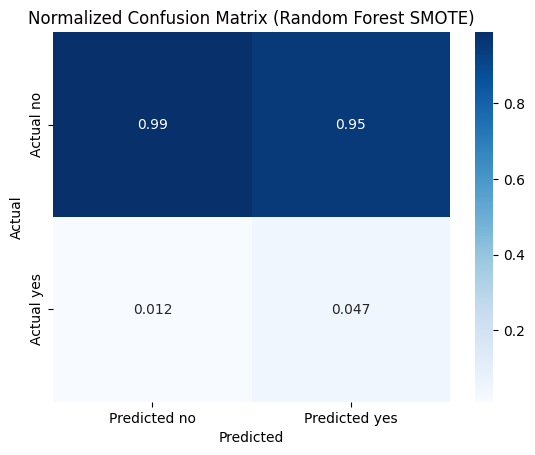

In [145]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Random Forest SMOTE)')
plt.show()

#### Neural Network

In [146]:
model = Sequential()
model.add(Input((X.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [147]:
model.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [148]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10


1664/1664 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - auc: 0.5185 - f1_score: 0.0281 - loss: 0.1535 - val_auc: 0.8498 - val_f1_score: 0.0274 - val_loss: 0.0582
Epoch 2/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - auc: 0.8510 - f1_score: 0.0281 - loss: 0.0600 - val_auc: 0.8541 - val_f1_score: 0.0274 - val_loss: 0.0577
Epoch 3/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - auc: 0.8661 - f1_score: 0.0294 - loss: 0.0599 - val_auc: 0.8700 - val_f1_score: 0.0274 - val_loss: 0.0555
Epoch 4/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - auc: 0.8626 - f1_score: 0.0271 - loss: 0.0559 - val_auc: 0.8607 - val_f1_score: 0.0274 - val_loss: 0.0571
Epoch 5/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - auc: 0.8540 - f1_score: 0.0260 - loss: 0.0552 - val_auc: 0.8635 - val_f1_score: 0.0274 - val_loss: 0.0562
Epoch 6/10
1664/1664 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - auc: 0.8793 - f1_score: 0.0279 - loss: 0.0550 - val_auc: 0.8595 - val_f1_score: 0.0274 - val_loss: 0.0571
Epoch 7/10
1664/1664 ━━━━━━

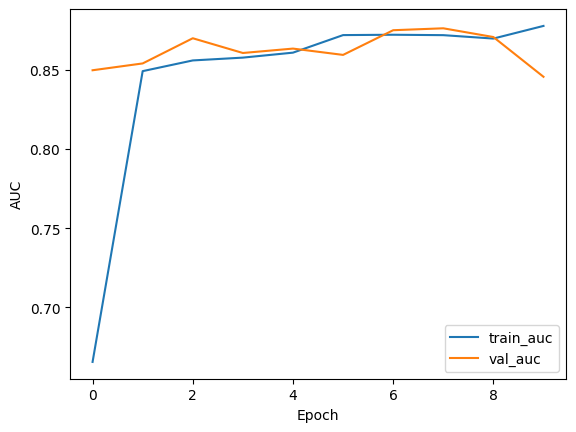

In [149]:
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [150]:
y_pred_proba = model.predict(x_test)

714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step


In [151]:
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

In [152]:
f1_score(y_test, y_pred)

0.006191950464396285

In [153]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc(fpr, tpr)

0.8822433910319143

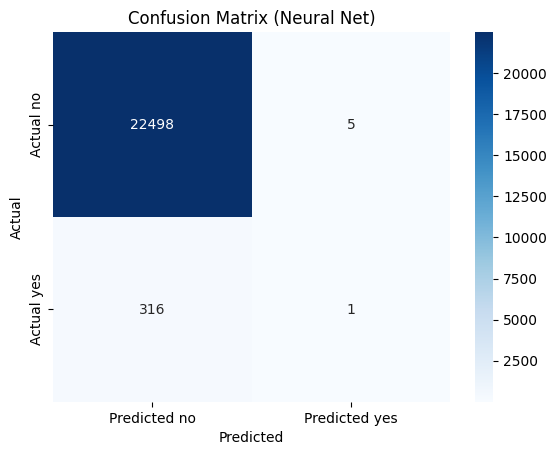

In [154]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Net)')
plt.show()

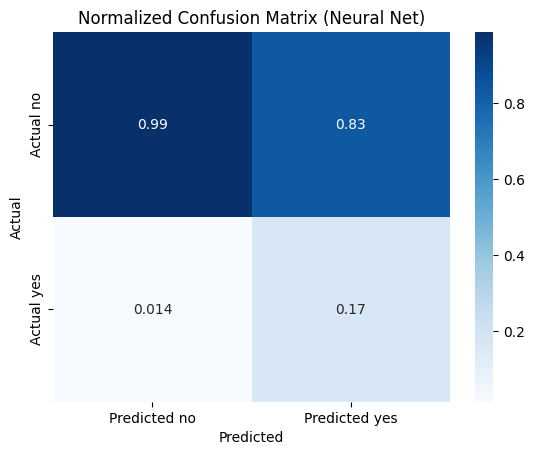

In [155]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Neural Net)')
plt.show()

In [156]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba)

In [157]:
model_evaluations["Neural Net"] = (fpr, tpr, prec, rec)

#### Neural Net SMOTE

In [158]:
model_smote = Sequential()

model_smote.add(Input((X.shape[1],)))
model_smote.add(Dense(32, activation='relu'))
model_smote.add(Dense(16, activation='relu'))
model_smote.add(Dropout(0.2))
model_smote.add(Dense(1, activation='sigmoid'))

In [159]:
model_smote.compile("adam", "binary_crossentropy", metrics=["f1_score", "auc"])
model_smote.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 32)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [160]:
history = model_smote.fit(x_res, y_res, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 36s 11ms/step - auc: 0.8533 - f1_score: 0.6636 - loss: 0.4679 - val_auc: 0.8593 - val_f1_score: 0.0274 - val_loss: 0.3571
Epoch 2/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - auc: 0.9048 - f1_score: 0.6657 - loss: 0.3889 - val_auc: 0.8535 - val_f1_score: 0.0274 - val_loss: 0.3820
Epoch 3/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - auc: 0.9114 - f1_score: 0.6687 - loss: 0.3743 - val_auc: 0.8508 - val_f1_score: 0.0274 - val_loss: 0.4202
Epoch 4/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 34s 10ms/step - auc: 0.9158 - f1_score: 0.6696 - loss: 0.3645 - val_auc: 0.8420 - val_f1_score: 0.0274 - val_loss: 0.4072
Epoch 5/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - auc: 0.9190 - f1_score: 0.6655 - loss: 0.3581 - val_auc: 0.8464 - val_f1_score: 0.0274 - val_loss: 0.4602
Epoch 6/10
3282/3282 ━━━━━━━━━━━━━━━━━━━━ 35s 11ms/step - auc: 0.9212 - f1_score: 0.6654 - loss: 0.3531 - val_auc: 0.8401 - val_f1_score: 0.0274 - val_loss: 0.3774
Epoch 7/10
3282/

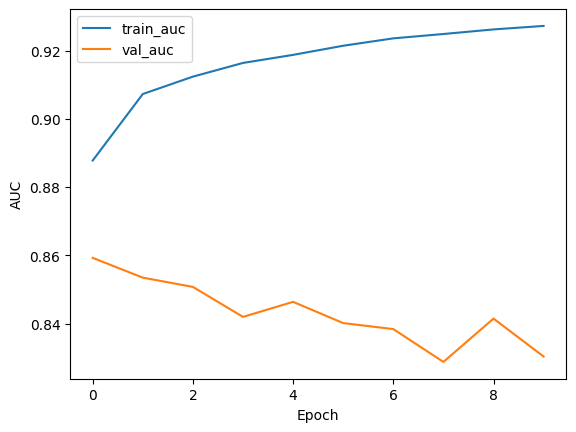

In [161]:
plt.plot(history.history["auc"], label="train_auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()

In [162]:
y_pred_proba = model.predict(x_test)

714/714 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step


In [163]:
y_pred = np.where(y_pred_proba >= 0.5, 1, 0)

In [164]:
f1_score(y_test, y_pred)

0.006191950464396285

In [165]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc(fpr, tpr)

0.8822433910319143

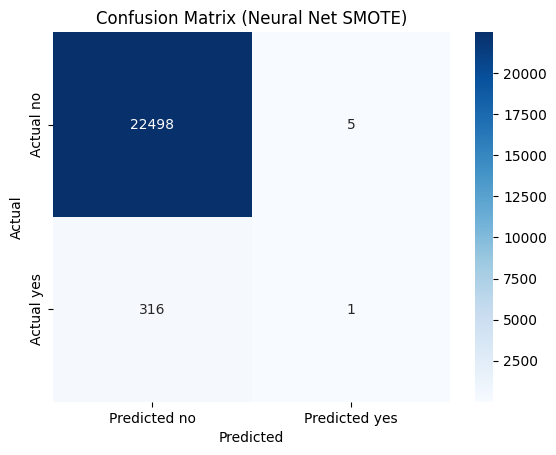

In [166]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Neural Net SMOTE)')
plt.show()

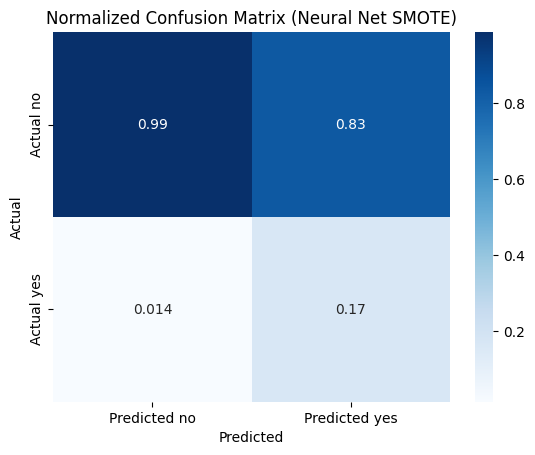

In [167]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (Neural Net SMOTE)')
plt.show()

In [168]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba)

In [169]:
model_evaluations["Neural Net SMOTE"] = (fpr, tpr, prec, rec)

#### XGBoost

In [170]:
xgb = XGBClassifier(random_state=RANDOM_SEED)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
y_pred_proba = xgb.predict_proba(x_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     22503
           1       0.32      0.09      0.13       317

    accuracy                           0.98     22820
   macro avg       0.65      0.54      0.56     22820
weighted avg       0.98      0.98      0.98     22820

0.13432835820895522


0.854122079201217

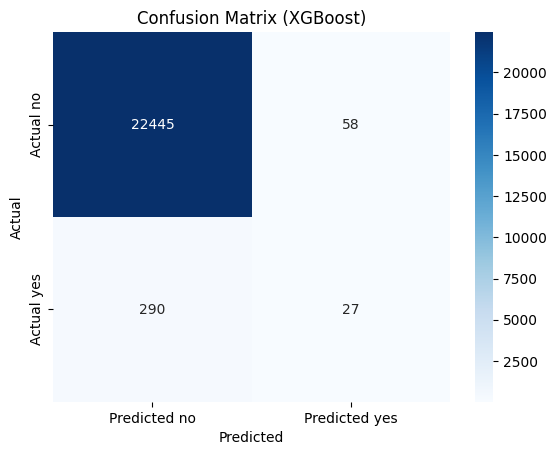

In [171]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost)')
plt.show()

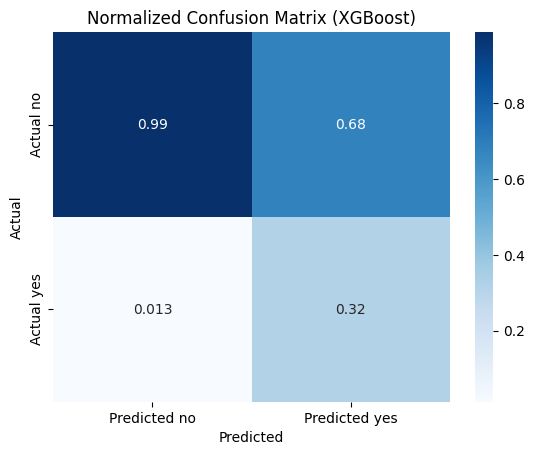

In [172]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (XGBoost)')
plt.show()

In [173]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [174]:
model_evaluations["XGBoost"] = (fpr, tpr, prec, rec)

In [175]:
xgb = XGBClassifier(random_state=RANDOM_SEED)
xgb.fit(x_res, y_res)
y_pred = xgb.predict(x_test)
y_pred_proba = xgb.predict_proba(x_test)
print(classification_report(y_test, y_pred))
print(f1_score(y_test, y_pred))
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])
auc(fpr, tpr)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     22503
           1       0.07      0.40      0.12       317

    accuracy                           0.92     22820
   macro avg       0.53      0.66      0.54     22820
weighted avg       0.98      0.92      0.95     22820

0.12026515151515152


0.7331274862615584

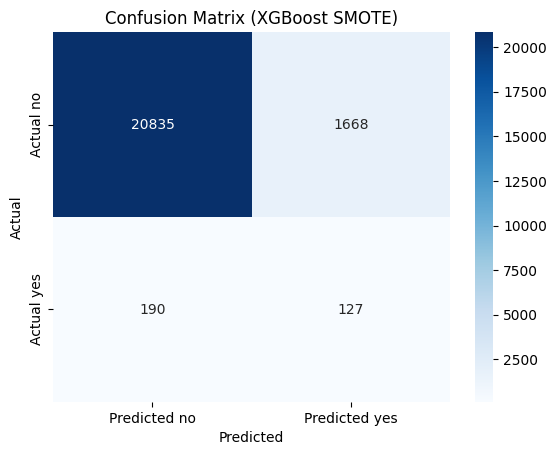

In [176]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Actual no", "Actual yes"], columns=["Predicted no", "Predicted yes"])
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost SMOTE)')
plt.show()

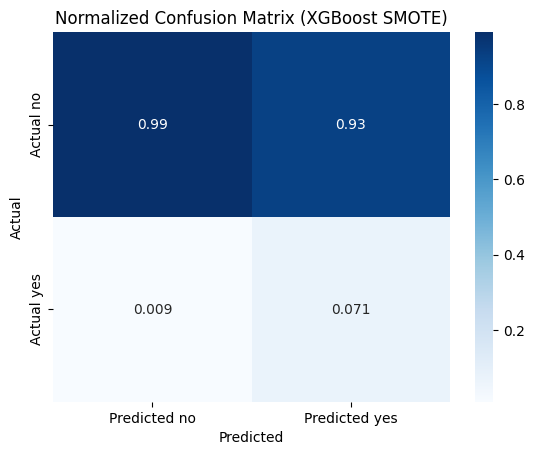

In [177]:
normalized_conf_mat = conf_mat / conf_mat.astype(float).to_numpy().sum(axis=0)
sns.heatmap(normalized_conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix (XGBoost SMOTE)')
plt.show()

In [178]:
prec, rec, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])

In [179]:
model_evaluations["XGBoost SMOTE"] = (fpr, tpr, prec, rec)

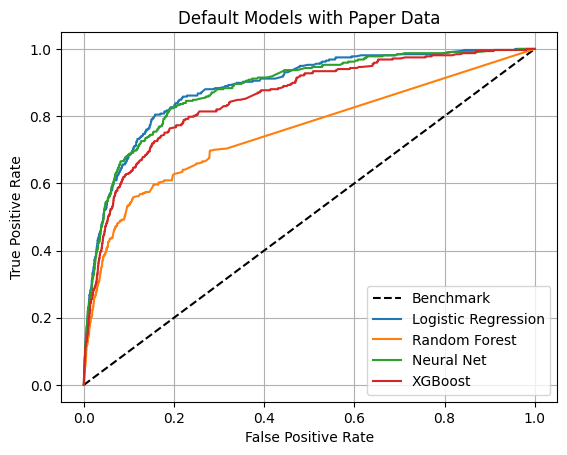

In [180]:
plt.title("Default Models with Paper Data")
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")

for model_name in model_evaluations:
    if "SMOTE" in model_name:
        continue
    plt.plot(model_evaluations[model_name][0], model_evaluations[model_name][1], label=model_name)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()

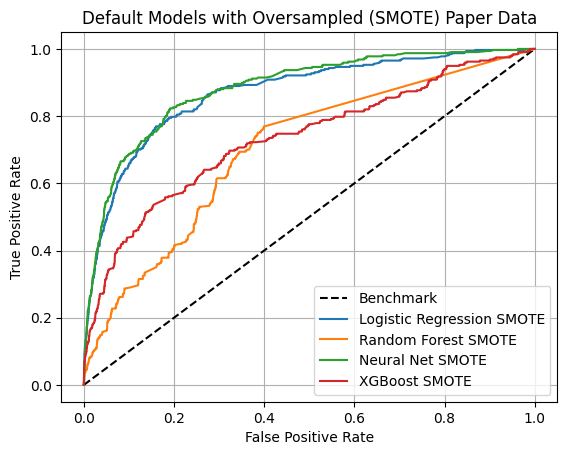

In [181]:
plt.title("Default Models with Oversampled (SMOTE) Paper Data")
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")

for model_name in model_evaluations:
    if "SMOTE" not in model_name:
        continue
    plt.plot(model_evaluations[model_name][0], model_evaluations[model_name][1], label=model_name)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()

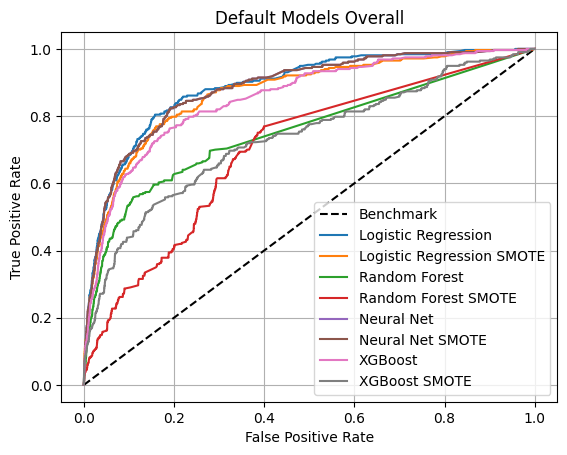

In [182]:
plt.title("Default Models Overall")
plt.plot([0, 1], [0, 1], color='black', linestyle='dashed', label="Benchmark")

for model_name in model_evaluations:
    plt.plot(model_evaluations[model_name][0], model_evaluations[model_name][1], label=model_name)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.grid()
plt.legend()

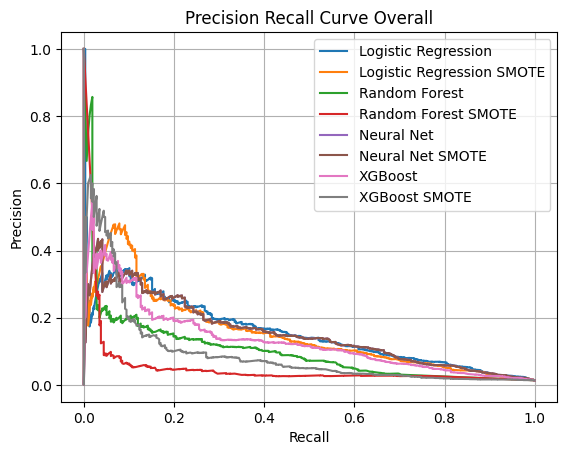

In [183]:
# precision recall curve
plt.title("Precision Recall Curve Overall")
for model_name in model_evaluations:
    plt.plot(model_evaluations[model_name][3], model_evaluations[model_name][2], label=model_name)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.legend()